<a href="https://colab.research.google.com/github/AshutoshKumarDubey/Topic_modeling_on_news_Articles/blob/main/Topic_Modelling_on_News_Articles_BY_Ashutosh_Kumar_Dubey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Let's Begin!**

## **Importing Neccessary Modules**

Now in this section we'll import all the neccessary libraries and packages we'll require to develop the required model.

In [ ]:
# importing os module
import os

# importing CountVectorizer for feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Importing data manipulation libraries
import numpy as np
import pandas as pd

# importing tqdm and display modules for progress meters/bars
from IPython.display import display
from tqdm import tqdm

# importing wordcloud to represent topics wordcloud
from wordcloud import WordCloud

# Model selection modules
from sklearn.model_selection import GridSearchCV

# Importing Counter
from collections import Counter

# import ast(abstract syntax tree)
import ast

# importing data visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# importing mlab for implementing MATLAB functions
import matplotlib.mlab as mlab

# importing statistics module
import scipy.stats as stats

# importing TSNE for data exploration and visualizing high-dimensional data
from sklearn.manifold import TSNE

# importing decomposition modules
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

# importing Natural Language Toolkit and other NLP modules
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word

# importing countVectorizer for text vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Note:-** The dataset in this case isn't collective, its been stored in form of numerous text files sub-categorized in 5 different domains. Hence, for loading the data we'll visit all text files individually and copy all articles to a dataframe along with their category.

In [ ]:
# The variable "directory" holds the address of text files stored in drive
directory = '/content/drive/MyDrive/bbc'

# All 5 sub-categories provided
subdirs = ['business', 'entertainment', 'politics', 'sport', 'tech']

# Create dataframe for gathering the articles
bbc = pd.DataFrame()
 
# Iterate over sub-directories to access the text files
for subdir in subdirs:

  # address to the subdirectory
  dir = directory + '/' + subdir

  # Iterate over all the text files present in a sub-directory
  for filename in os.listdir(dir):
    
    # Get file address
    filepath = os.path.join(dir, filename)

    # Traversing over text files and storing the articles into the dataframe
    try:
      data = open(filepath,'r').read()

      # escape characters to be ignored in the text
      escape = ['\n']
      
      # removing escape characters from text
      for elem in escape:
        data = data.replace(elem, ' ')
      
      # Storing article to the dataframe
      dict1 = {'Filename': filename.split('.')[0], 'Contents': data.lower(), 'Category':subdir}
      bbc = bbc.append(dict1, ignore_index=True, verify_integrity = True)

    # Ignore exception, if any
    except:
      pass    

## **Understanding the Data**

Now we'll gather the data files and perform some basic operations to understand the data and how we can process it to improve the model performance. We will also apply some basic EDA to better understand the data.

**The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology.**
There are over 2000 news article available in these categories.

Note:- There was a particular file in this dataset which was formatted differently from the rest of the files, hence while reading the data, the text formatting was throwing an exception. For such case we have neglected the file altogether, since the case was relevant to only a single file. 

In [ ]:
# Display dataframe
bbc

,Filename,Contents,Category
0,472,china suspends 26 power projects china has or...,business
1,510,lacroix label bought by us firm luxury goods ...,business
2,509,euro firms miss out on optimism more than 90%...,business
3,486,india's reliance family feud heats up the ong...,business
4,506,trial begins of spain's top banker the trial ...,business
...,...,...,...
2219,002,china net cafe culture crackdown chinese auth...,tech
2220,016,global blogger action day called the global w...,tech
2221,036,microsoft seeking spyware trojan microsoft is...,tech
2222,017,finding new homes for old phones re-using old...,tech


**The dataset consists of the following attributes:**

●	Index: Entry index.

●	FileName: Destination File name/number.

●	Contents: Complete transcript of a article, this contains all the textual data present in the destination file for a particular entry.

●	Category: Theme/domain of a article.


In [ ]:
# Size of dataset
bbc.shape

(2224, 3)

Now, lets check if a particular article is being stored more than once into the dataframe. Having duplicates in our data would cause inconsistencies in results.

In [ ]:
# Checking for duplicate rows
bbc[bbc.duplicated(subset = "Contents")]

,Filename,Contents,Category
127,215,sec to rethink post-enron rules the us stock ...,business
157,240,economy 'strong' in election year uk business...,business
370,333,troubled marsh under sec scrutiny the us stoc...,business
450,292,steady job growth continues in us the us crea...,business
464,258,s korea spending boost to economy south korea...,business
...,...,...,...
2205,004,digital guru floats sub-$100 pc nicholas negr...,tech
2208,040,apple ipod family expands market apple has ex...,tech
2209,012,ibm puts cash behind linux push ibm is spendi...,tech
2213,027,warning over tsunami aid website net users ar...,tech


We can see there are 99 duplicate rows, it resembles that these articles are present more than once, we need to drop such rows before we proceed further with the model development.


In [ ]:
# Dropping duplicate entries
bbc = bbc.drop_duplicates(subset=['Contents'], keep='first')
bbc

,Filename,Contents,Category
0,472,china suspends 26 power projects china has or...,business
1,510,lacroix label bought by us firm luxury goods ...,business
2,509,euro firms miss out on optimism more than 90%...,business
3,486,india's reliance family feud heats up the ong...,business
4,506,trial begins of spain's top banker the trial ...,business
...,...,...,...
2218,028,piero gives rugby perspective bbc sport unvei...,tech
2219,002,china net cafe culture crackdown chinese auth...,tech
2220,016,global blogger action day called the global w...,tech
2222,017,finding new homes for old phones re-using old...,tech


In [ ]:
# Size of dataset after removing duplicates
bbc.shape

(2125, 3)

In [ ]:
#Checking null values in columns 
bbc.isnull().sum()

Filename    0
Contents    0
Category    0
dtype: int64

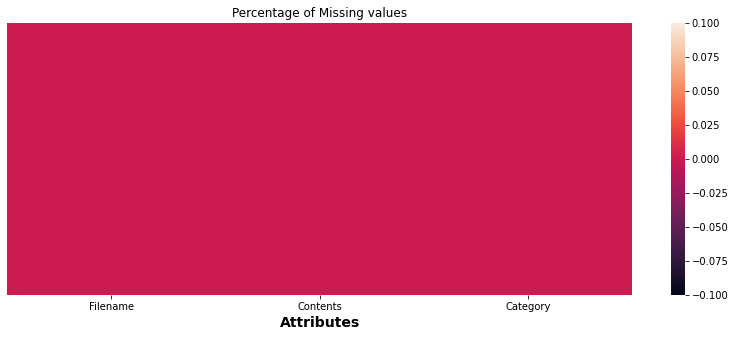

In [ ]:
#PLottinh the heatmap for null values
plt.figure(figsize=(14, 5))
sns.heatmap(bbc.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Attributes", size=14, weight="bold")
plt.title("Percentage of Missing values")
plt.show()

<u/>**Why this plot?**</u>

A heat map helps you visualize density. It is a graphical representation of data where values are depicted by color.

**Inference**

There are no missing values.

